In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Generalized variables
textwidth_cm = 16.50764  # Text width in cm
aspect_ratio = 0.618     # Aspect ratio (height/width) using the golden ratio

# Font sizes
label_fontsize = 12
legend_fontsize = 12
tick_fontsize = 10
colorbar_label_fontsize = 12
colorbar_tick_fontsize = 10
offset_text_fontsize = 12
tick_fontsize = 10
errorbar_capsize = 5

# Convert text width from cm to inches
textwidth_in = textwidth_cm / 2.54

# Calculate figure size based on text width and aspect ratio
fig_width = textwidth_in
fig_height = textwidth_in * aspect_ratio

save_dir = '/home/pkruyt/cernbox/figures_thesis/betacool_benchmark/'

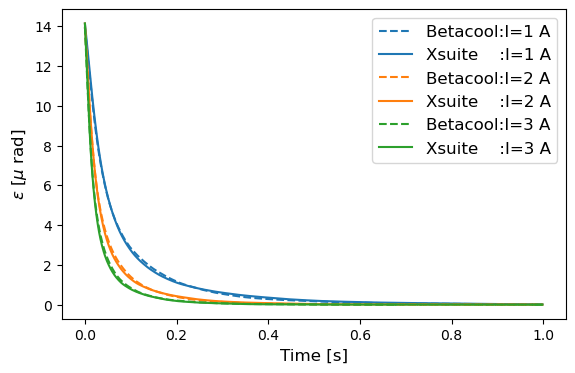

In [2]:
current_list = [1,2,3] # A

def load_data(module,current):
    filename = f"results/emittance_{module}_I={current}.npz"
    data = np.load(filename)
    time = data['time']
    emittance_x = data['emittance_x']
    emittance_y = data['emittance_y']
    dp_p=data['dp_p']
    return time, emittance_x,emittance_y,dp_p

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(fig_width, fig_height))
plt.rcParams.update({'font.size': label_fontsize})

for i,current in enumerate(current_list):
    time, emittance_x,emittance_y,dp_p = load_data('betacool',current)
    plt.plot(time, emittance_x*1e6, label=f'Betacool:I={current} A',color=cmap(i),linestyle='--')
    time, emittance_x,emittance_y,dp_p= load_data('xsuite',current)
    plt.plot(time, emittance_x*1e6, label=f'Xsuite    :I={current} A',color=cmap(i))

plt.xlabel('Time [s]', fontsize=label_fontsize)
plt.ylabel(r'$\epsilon$ [$\mu$ rad]', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tick_params(labelsize=tick_fontsize)
# Save figures
# plt.savefig('LEIR_emittance_current.png', dpi=300)
# plt.savefig('LEIR_emittance_current.eps', dpi=300, format='eps')
image_name = 'LEIR_emittance_current.png'
save_location = os.path.join(save_dir, image_name)
plt.savefig(save_location, dpi=300, bbox_inches='tight')
plt.show()